In [108]:
import becquerel as bq
from becquerel import Spectrum
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import math
import importlib
import sys  
sys.path.insert(0, r'C:\Users\ahanks\DoseNet\radwatch-analysis')

In [109]:
import PF
import ROI
importlib.reload(PF)
importlib.reload(ROI)

<module 'ROI' from 'C:\\Users\\ahanks\\DoseNet\\radwatch-analysis\\ROI.py'>

In [113]:
spec = Spectrum.from_file(r'C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\ucb1901-30min.Spe')

SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\ucb1901-30min.Spe


In [114]:
bg = Spectrum.from_file(r'C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\Background_Spectrum_12_20_19.Spe')

SpeFile: Reading file C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\Background_Spectrum_12_20_19.Spe


In [121]:
ecal_filename = r'C:\Users\ahanks\Google Drive\RadWatch\Gamma\Gamma Spectra\Fish Samples 2019\NAA\11-19-2019-Calibration.Ent'
e_cal_data = np.loadtxt(ecal_filename)
cal_energies = e_cal_data[:,0]
cal_chans = e_cal_data[:,1]

In [122]:
cal = bq.LinearEnergyCal.from_points(cal_chans,cal_energies)
bg.apply_calibration(cal)

In [124]:
spec.apply_calibration(cal)

In [127]:
sub_spec = spec - bg

C:\Users\ahanks\Anaconda3\lib\site-packages\becquerel-0.2.4-py3.7.egg\becquerel\core\spectrum.py:726: SpectrumWarning: Subtraction of counts-based specta, spectra have been converted to CPS
  'have been converted to CPS', SpectrumWarning)


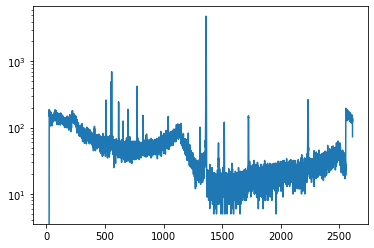

In [133]:
plt.plot(spec.bin_centers_kev, spec.counts_vals)
plt.yscale('log')
plt.show()

In [134]:
kernel = bq.GaussianPeakFilter(4250, 30, fwhm_at_0=10)

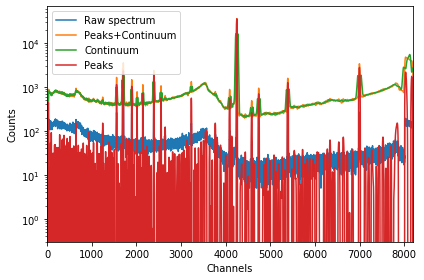

In [135]:
finder = bq.PeakFinder(spec, kernel)

plt.figure()
plt.plot(spec.counts_vals.clip(1e-1), label='Raw spectrum')
plt.plot(finder._peak_plus_bkg.clip(1e-1), label='Peaks+Continuum')
plt.plot(finder._bkg.clip(1e-1), label='Continuum')
plt.plot(finder._signal.clip(1e-1), label='Peaks')
plt.yscale('log')
plt.xlim(0, len(spec))
plt.ylim(3e-1)
plt.xlabel('Channels')
plt.ylabel('Counts')
plt.legend()
plt.tight_layout()

[1556.5, 1708.5, 1896.5, 2014.5, 2145.5, 2390.5, 2551.5, 3230.5, 4087.5, 4248.5, 4581.5, 4739.5, 5389.5, 6993.5, 8028.5, 8165.5]
[28.78040124987538, 39.69033246586671, 27.820371001108363, 13.347103825258186, 21.30580264657217, 40.03422006599558, 17.549257559385122, 15.199922835384445, 18.45685591563947, 194.41785622316573, 11.645442054907736, 23.059112618683272, 32.31203855531306, 49.03868224805949, 32.19398610040029, 28.380873368204792]


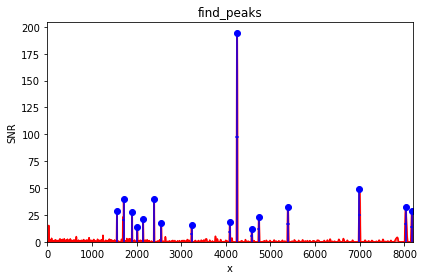

In [136]:
finder.reset()
finder.find_peaks(min_snr=10, xmin=50)
print(finder.channels)
print(finder.snrs)

plt.figure()
plt.title('find_peaks')
finder.plot()
plt.tight_layout()

In [137]:
energies = np.take(spec.bin_edges_kev,finder.channels)
energies

array([ 508.36293069,  556.60889225,  616.28152893,  653.73563067,
        695.31603176,  773.08090402,  824.18353436, 1039.7033232 ,
       1311.72167229, 1362.82430263, 1468.52104738, 1518.67145479,
       1724.98642202, 2234.10827959, 2562.62518894, 2606.11003588])

In [138]:
import naa_isotope_analyzer as naa
importlib.reload(naa)

<module 'naa_isotope_analyzer' from 'C:\\Users\\ahanks\\DoseNet\\radwatch-analysis\\naa_isotope_analyzer.py'>

In [139]:
hl_cut = 3600 # half-life cut in seconds
br_cut = 4.0 # branching ratio cut in %
df = naa.naa_isotope_analyzer(energies.tolist(),hl_cut,br_cut)
#df

Backround isotopes [[], [], [], [], [], ['AC228'], [], [], [], [], [], [], [], [], [], []]
Possible isotopes [['CU64', 'ZN65', 'ZN71', 'ZN71', 'KR79', 'SR85', 'ZR97', 'TE121', 'PA232'], ['GE77', 'AS76', 'AS76', 'CD117', 'IN114', 'SB122', 'CS134', 'CS134', 'HO166', 'OS193', 'PA232'], ['ZN71', 'ZN71', 'GA72', 'BR82', 'AG110', 'BA131', 'W187', 'W187'], ['AS76', 'RU105', 'AG110', 'TE131', 'CE143', 'ND149'], ['BR82', 'ZR97', 'NB94', 'AG110', 'SB124', 'TE129'], ['ZN71', 'ZN71', 'GA72', 'GE77', 'GE77', 'BR82', 'MO99', 'TE131', 'TE131', 'EU152', 'HO166', 'W187'], ['GA72', 'BR82', 'KR79', 'SN125', 'TE131', 'HO166'], ['GA72', 'BR82', 'SB124', 'BA131'], ['BR82', 'SB124', 'TB160'], ['NA24', 'GE77', 'ZR97', 'CD117', 'SB124', 'CS134'], ['NI65', 'BR82', 'MO93', 'AG110'], ['K42'], [], [], [], []]
Possible isotope br [[35.2+/-0.4, 2.842+/-0.014, 28.7+/-1.4, 28.7+/-1.4, 14.0+/-0.6, 96.0, 5.03+/-0.19, 17.7+/-0.5, 5.42+/-0.14], [16.8+/-1.0, 45.0, 1.2+/-0.08, 14.7+/-0.8, 4.4+/-0.6, 70.67, 8.338+/-0.014, 15